In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
X=pd.read_csv("train.csv")
X_train=X.iloc[:,:-1]
y_train=X.iloc[:,-1:]

In [4]:
y=pd.read_csv("test.csv")
X_test=y.iloc[:,:-1]
y_test=y.iloc[:,-1:]

In [5]:
X_train.shape

(103904, 24)

In [6]:
type(X_train)

pandas.core.frame.DataFrame

In [7]:
y_train.shape

(103904, 1)

In [9]:
y_test = pd.get_dummies(y_test)
y_test=y_test['satisfaction_satisfied']
#y_test=pd.DataFrame(y_test)
y_test

0         True
1         True
2        False
3         True
4         True
         ...  
25971    False
25972     True
25973    False
25974     True
25975    False
Name: satisfaction_satisfied, Length: 25976, dtype: bool

In [10]:
y_train = pd.get_dummies(y_train)
y_train=y_train['satisfaction_satisfied']
#y_train=pd.DataFrame(y_train)
y_train

0         False
1         False
2          True
3         False
4          True
          ...  
103899    False
103900     True
103901    False
103902    False
103903    False
Name: satisfaction_satisfied, Length: 103904, dtype: bool

In [11]:
X_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [13]:
X_train = pd.get_dummies(X_train, columns=['Type of Travel'], drop_first=True)
X_train = pd.get_dummies(X_train, columns=['Customer Type'], drop_first=True)
X_train = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
X_train = pd.get_dummies(X_train, columns=['Class'], drop_first=True)




In [14]:
X_train.columns

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Type of Travel_Personal Travel', 'Customer Type_disloyal Customer',
       'Gender_Male', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [15]:
X_train.isnull().values.any()

True

In [16]:
X_train.max()


Unnamed: 0                           103903
id                                   129880
Age                                      85
Flight Distance                        4983
Inflight wifi service                     5
Departure/Arrival time convenient         5
Ease of Online booking                    5
Gate location                             5
Food and drink                            5
Online boarding                           5
Seat comfort                              5
Inflight entertainment                    5
On-board service                          5
Leg room service                          5
Baggage handling                          5
Checkin service                           5
Inflight service                          5
Cleanliness                               5
Departure Delay in Minutes             1592
Arrival Delay in Minutes             1584.0
Type of Travel_Personal Travel         True
Customer Type_disloyal Customer        True
Gender_Male                     

In [17]:
X_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Type of Travel_Personal Travel         0
Customer Type_disloyal Customer        0
Gender_Male                            0
Class_Eco                              0
Class_Eco Plus  

In [18]:
X_train['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].median(),inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_29104\3447878467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].median(),inplace=True)


In [19]:
X_train.isnull().values.any()

False

In [20]:
X_train=X_train.drop(['id'],axis=1)
X_train=X_train.drop(['Unnamed: 0'],axis=1)

In [21]:
correlation=X_train.corr()

In [22]:
import seaborn as sns

<Axes: >

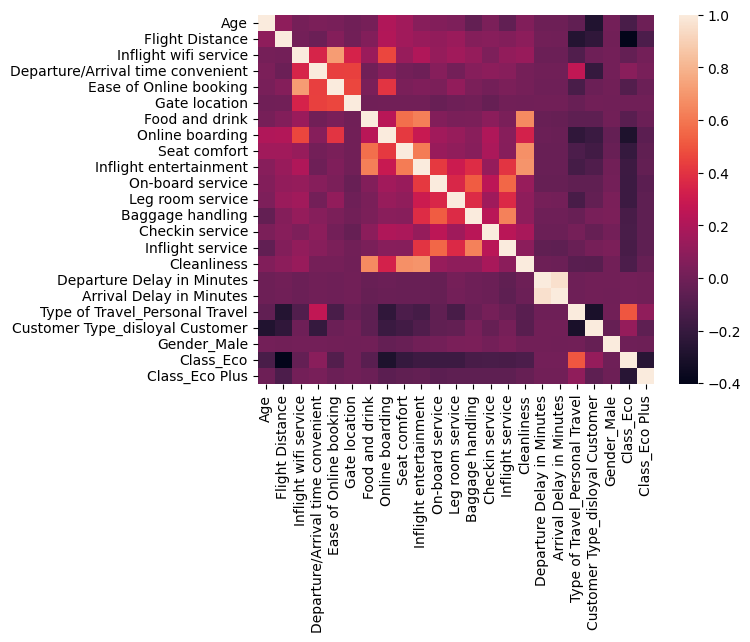

In [23]:
sns.heatmap(correlation)

In [24]:
correlation_with_target=X_train.corrwith(y_train)

In [25]:
y_train

0         False
1         False
2          True
3         False
4          True
          ...  
103899    False
103900     True
103901    False
103902    False
103903    False
Name: satisfaction_satisfied, Length: 103904, dtype: bool

In [26]:
correlation_with_target=correlation_with_target.sort_values(ascending=False)

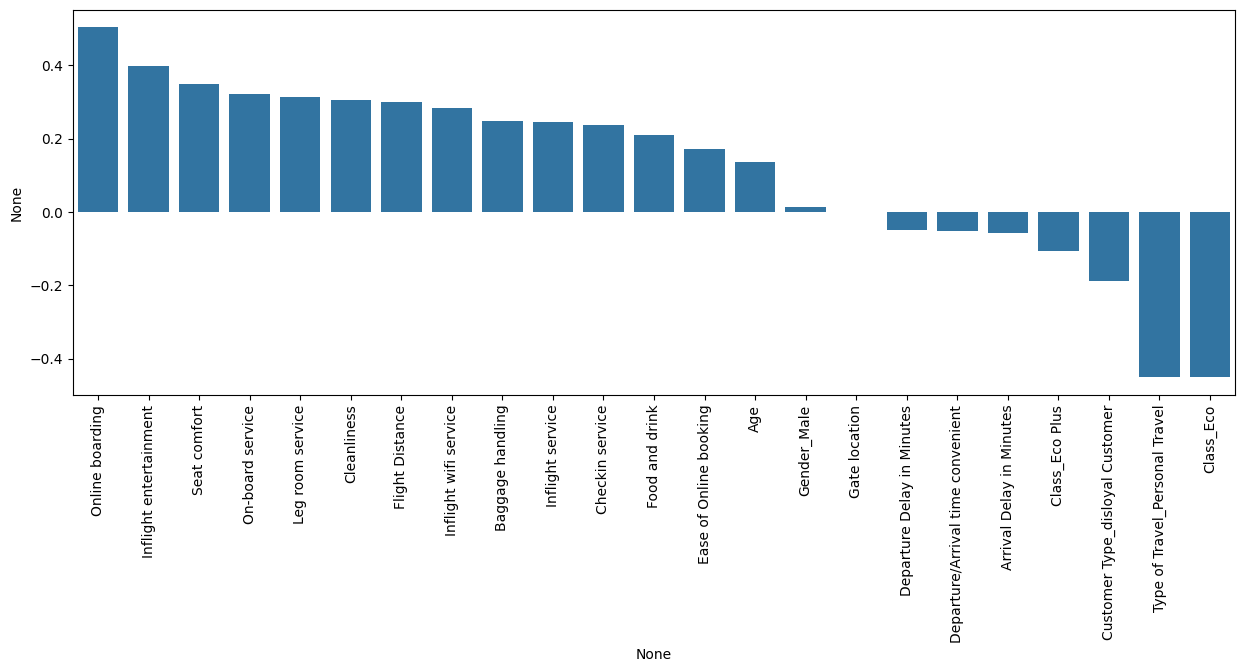

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=correlation_with_target.index,y=correlation_with_target)
plt.xticks(rotation=90)

plt.show()

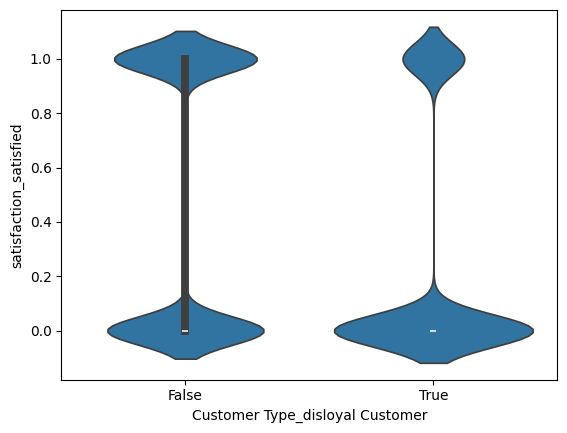

In [28]:
sns.violinplot(x=X_train['Customer Type_disloyal Customer'], y=y_train, data=X_train)
plt.show()

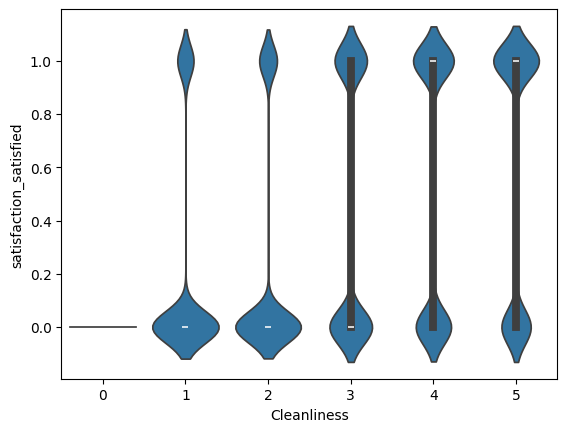

In [29]:
sns.violinplot(x=X_train['Cleanliness'], y=y_train, data=X_train)
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


array([[0.07692308, 0.08663166, 0.6       , ..., 1.        , 0.        ,
        1.        ],
       [0.23076923, 0.04119548, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.24358974, 0.2243538 , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29487179, 0.39660743, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.19230769, 0.19567851, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.25641026, 0.34168013, 0.2       , ..., 1.        , 0.        ,
        0.        ]])

In [32]:
X_test = pd.get_dummies(X_test, columns=['Type of Travel'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Customer Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Class'], drop_first=True)
X_test['Arrival Delay in Minutes'].fillna(X_test['Arrival Delay in Minutes'].median(),inplace=True)
X_test=X_test.drop(['id'],axis=1)
X_test=X_test.drop(['Unnamed: 0'],axis=1)

C:\Users\prabh\AppData\Local\Temp\ipykernel_29104\2873093349.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Arrival Delay in Minutes'].fillna(X_test['Arrival Delay in Minutes'].median(),inplace=True)


In [33]:
X_test = scaler.transform(X_test)

In [34]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [81]:
model=Sequential()
model.add(tf.keras.layers.Dense(units=10,activation='relu',input_dim=len(X_train[0])))
model.add(tf.keras.layers.Dense(units=10,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [82]:
from tensorflow.keras.optimizers import Adagrad
cust=Adagrad(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=cust ,metrics=['accuracy'])

In [83]:
model.fit(X_train, y_train, epochs=100, batch_size=700)

Epoch 1/100
149/149 [==============================] - 1s 4ms/step - loss: 0.6254 - accuracy: 0.6834
Epoch 2/100
149/149 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.8088
Epoch 3/100
149/149 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.8268
Epoch 4/100
149/149 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8387
Epoch 5/100
149/149 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8478
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8545
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8595
Epoch 8/100
149/149 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8637
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8665
Epoch 10/100
149/149 [==============================] - 0s 3ms/step - loss: 0.3293 - accura

In [84]:
y_pred=model.predict(X_test)
y_pred= [0 if val<0.5 else 1 for val in y_pred]


812/812 [==============================] - 1s 763us/step


In [85]:
accuracy_score(y_test,y_pred)

0.9209655066214968

In [99]:
#Using my randomly generated feedback data
p=np.array([21,1000,5,4,2,1,2,3,5,4,5,4,5,5,3,5,6,4,1,0,1,1,0])
p=p.reshape(1,-1)
p=scaler.transform(p)
y_prede=model.predict(p)
y_prede

1/1 [==============================] - 0s 21ms/step


c:\Users\prabh\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.5947176]], dtype=float32)

In [100]:
if y_prede>=0.5:
  print("satisfied")
else:
  print("not satisfied")

satisfied
